In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver3D as s3

In [2]:
mesh = IntervalMesh(20, 0, 1)

In [3]:
m0 = 1e-3
dt = 0.5
T = 150
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/test"

solver = s3.Solver3D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
mass = solver.solve()

time=0: 
iter=1: norm=0.00144921
iter=2: norm=2.32416e-06
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
time=0.5: 
iter=1: norm=0.000288504
time=1: 
iter=1: norm=0.000361463
time=1.5: 
iter=1: norm=0.000443595
time=2: 
iter=1: norm=0.000544599
time=2.5: 
iter=1: norm=0.000666271
time=3: 
iter=1: norm=0.000812022
time=3.5: 
iter=1: norm=0.000985573
time=4: 
iter=1: norm=0.00119089
iter=2: norm=8.86592e-06
time=4.5: 
iter=1: norm=0.00142329
iter=2: norm=1.28419e-05
time=5: 
iter=1: norm=0.00170043
iter=2: norm=1.85499e-05
time=5.5: 
iter=1: norm=0.00201969
iter=2: norm=2.6561e-05
time=6: 
iter=1: norm=0.00238379
iter=2: norm=3.76626e-05
time=6.5: 
iter=1: norm=0.00279437
iter=2: norm=5.28336e-05
time=7: 
iter=1: norm=0.0032516
iter=2: norm=7.32497e-05
time=7.5: 
iter=1: norm=0.00375362
iter=2: norm=0.000100265
time=8: 
iter=1: norm=0.00429612
iter=2: norm=

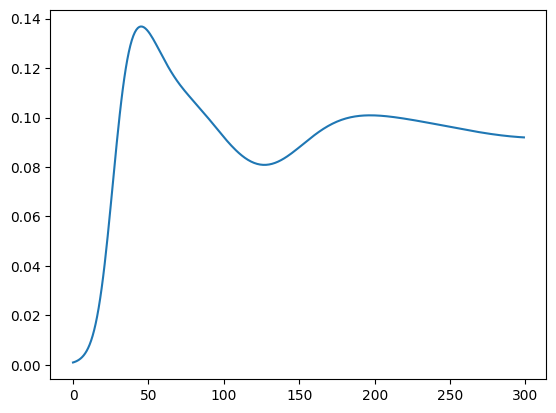

In [4]:
# mass = np.load('solutions/test/mass.npy')
plt.plot(mass)

In [4]:
class VerticalAverage(UserExpression):
    def __init__(self, f, quad_degree, **kwargs):
        super().__init__(**kwargs)
        self.f = f
        self.points, self.weights = leggauss(quad_degree)
        self.x = 0.5*(self.points + 1)
        assert f.ufl_shape == ()
        
    def eval(self, values, x):
        values[0] = 0.5*sum(wq*self.f(x[0], xq) for xq, wq in zip(self.x, self.weights))

    def value_shape(self):
        return ()
    
mesh2D = UnitSquareMesh(10,10)
V2D = FunctionSpace(mesh2D, "CG", 1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[1]-s0,2)/(2*sigma*sigma))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=1)
phi = VerticalAverage(n0, 10, degree=1)
phi = interpolate(phi, V1D)
plot(phi)

NameError: name 'V1D' is not defined

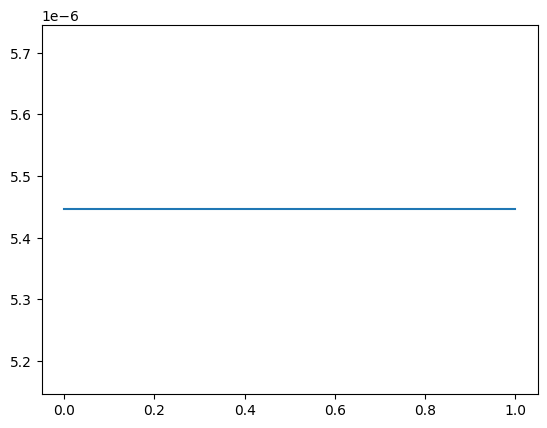

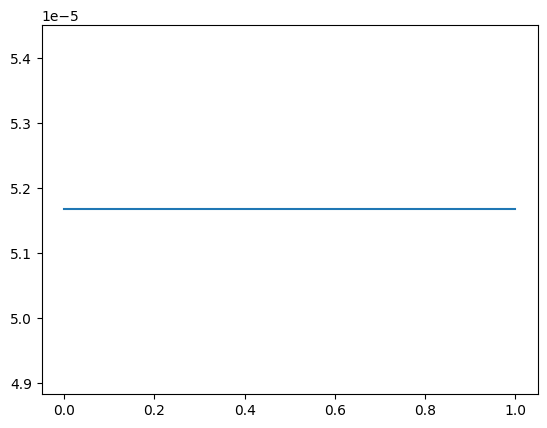

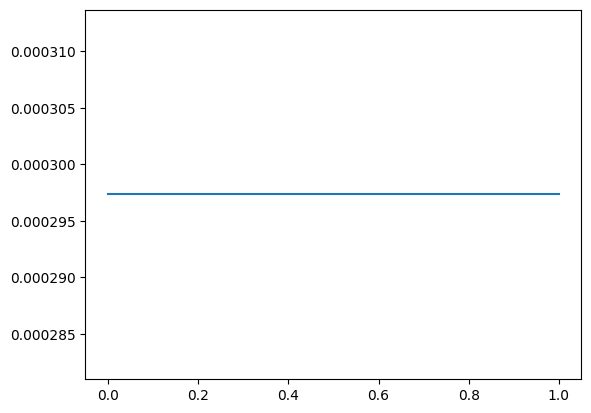

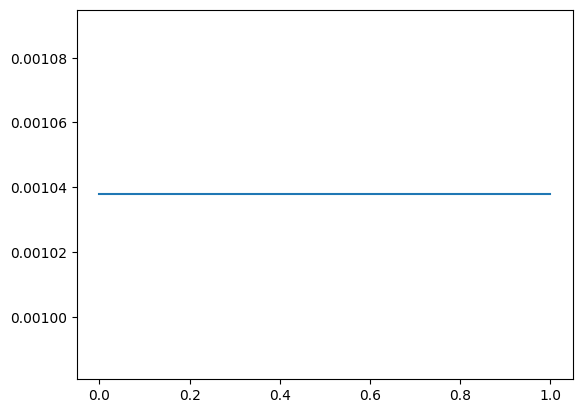

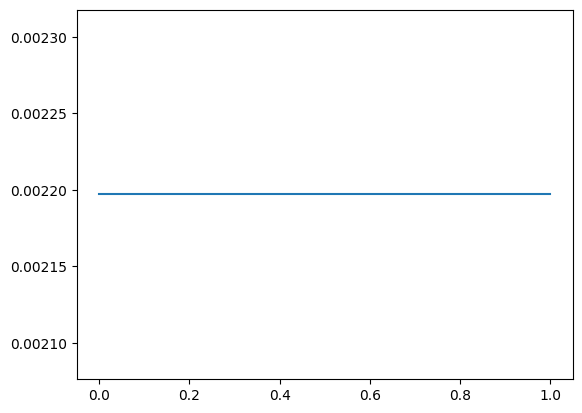

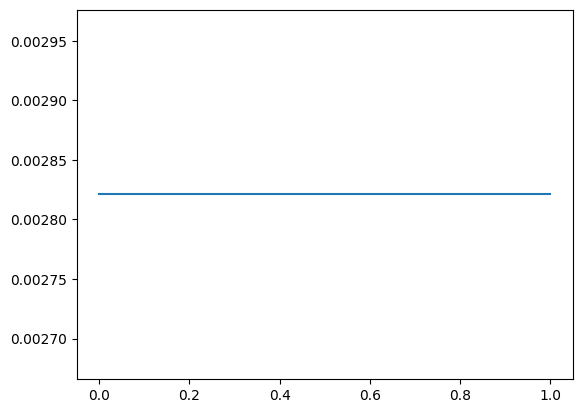

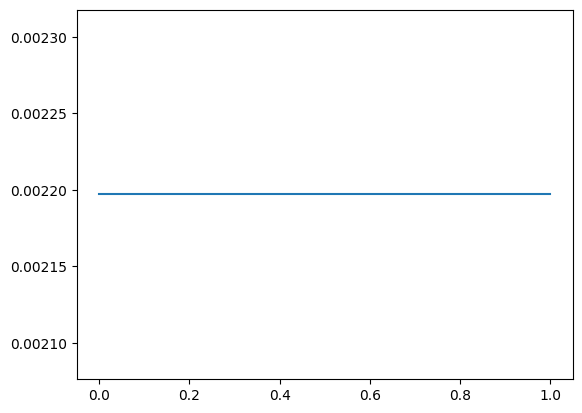

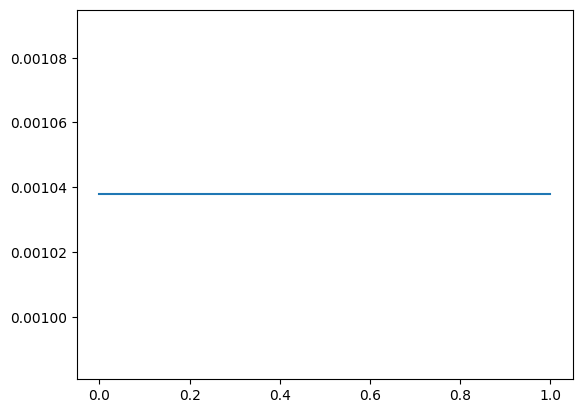

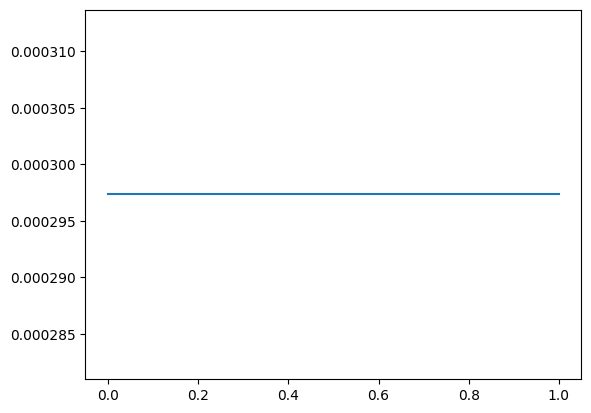

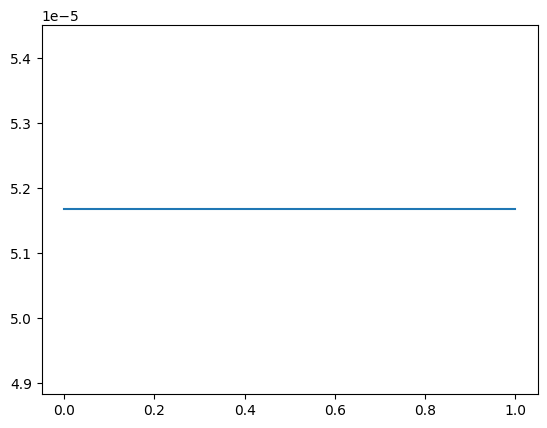

In [18]:
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),s=0,degree=1)
for i in range(10):
    temp = Function(V)
    n0.s = i*0.1
    temp.assign(n0)
    temp = interpolate(temp, V)
    plot(temp)
    plt.show()

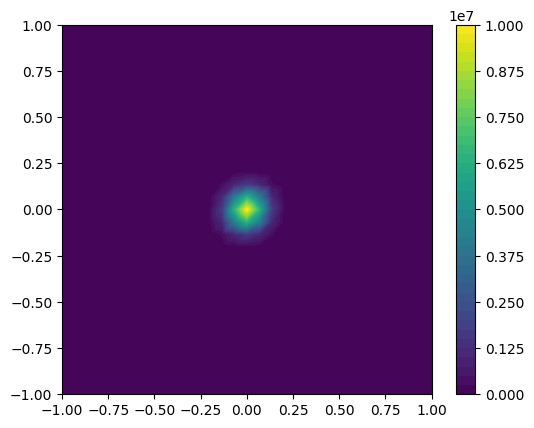

In [ ]:
mesh = RectangleMesh(Point(-1, -1), Point(1, 1), 30, 30)
V = FunctionSpace(mesh, "CG", 1)
Vc = Expression('1e7*exp(-x[0]*x[0]/(sigma_v*sigma_v)- x[1]*x[1]/(sigma_v*sigma_v))',sigma_v = 0.1,degree=2)
Vc = interpolate(Vc, V)
plot(Vc)
plt.colorbar(plot(Vc))